# Sign Game Server

Game Plan:

In [15]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import models
from tensorflow.keras import Sequential, layers
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import string

In [16]:
from sign_game.ml.evaluate import evaluate_model

In [17]:
!pip list | grep sign_game

protobuf 3.11.0

## Dataset Preprocessing

In [49]:
# Dataset
df1 = pd.read_csv('../raw_data/csv_data/train.csv')
df2 = pd.read_csv('../raw_data/csv_data/test.csv')
df_real = pd.read_csv('../raw_data/self_test.csv')



Unnamed: 0  WRIST_X   WRIST_Y   WRIST_Z        THUMB_CMC_X  THUMB_CMC_Y  THUMB_CMC_Z  THUMB_MCP_X  THUMB_MCP_Y  THUMB_MCP_Z  THUMB_IP_X  THUMB_IP_Y  THUMB_IP_Z  THUMB_TIP_X  THUMB_TIP_Y  THUMB_TIP_Z  INDEX_FINGER_MCP_X  INDEX_FINGER_MCP_Y  INDEX_FINGER_MCP_Z  INDEX_FINGER_PIP_X  INDEX_FINGER_PIP_Y  INDEX_FINGER_PIP_Z  INDEX_FINGER_DIP_X  INDEX_FINGER_DIP_Y  INDEX_FINGER_DIP_Z  INDEX_FINGER_TIP_X  INDEX_FINGER_TIP_Y  INDEX_FINGER_TIP_Z  MIDDLE_FINGER_MCP_X  MIDDLE_FINGER_MCP_Y  MIDDLE_FINGER_MCP_Z  MIDDLE_FINGER_PIP_X  MIDDLE_FINGER_PIP_Y  MIDDLE_FINGER_PIP_Z  MIDDLE_FINGER_DIP_X  MIDDLE_FINGER_DIP_Y  MIDDLE_FINGER_DIP_Z  MIDDLE_FINGER_TIP_X  MIDDLE_FINGER_TIP_Y  MIDDLE_FINGER_TIP_Z  RING_FINGER_MCP_X  RING_FINGER_MCP_Y  RING_FINGER_MCP_Z  RING_FINGER_PIP_X  RING_FINGER_PIP_Y  RING_FINGER_PIP_Z  RING_FINGER_DIP_X  RING_FINGER_DIP_Y  RING_FINGER_DIP_Z  RING_FINGER_TIP_X  RING_FINGER_TIP_Y  RING_FINGER_TIP_Z  PINKY_MCP_X  PINKY_MCP_Y  PINKY_MCP_Z  PINKY_PIP_X  PINKY_PIP_Y  PINKY_PIP_Z  PI

In [19]:
df = df1.copy().dropna().reset_index()
test_df = df2.copy().dropna().reset_index()
df_rw = df_real.copy().dropna().reset_index()

In [20]:
df_rw.columns

Index(['index', 'Unnamed: 0', 'WRIST_X', 'WRIST_Y', 'WRIST_Z', 'THUMB_CMC_X',
       'THUMB_CMC_Y', 'THUMB_CMC_Z', 'THUMB_MCP_X', 'THUMB_MCP_Y',
       'THUMB_MCP_Z', 'THUMB_IP_X', 'THUMB_IP_Y', 'THUMB_IP_Z', 'THUMB_TIP_X',
       'THUMB_TIP_Y', 'THUMB_TIP_Z', 'INDEX_FINGER_MCP_X',
       'INDEX_FINGER_MCP_Y', 'INDEX_FINGER_MCP_Z', 'INDEX_FINGER_PIP_X',
       'INDEX_FINGER_PIP_Y', 'INDEX_FINGER_PIP_Z', 'INDEX_FINGER_DIP_X',
       'INDEX_FINGER_DIP_Y', 'INDEX_FINGER_DIP_Z', 'INDEX_FINGER_TIP_X',
       'INDEX_FINGER_TIP_Y', 'INDEX_FINGER_TIP_Z', 'MIDDLE_FINGER_MCP_X',
       'MIDDLE_FINGER_MCP_Y', 'MIDDLE_FINGER_MCP_Z', 'MIDDLE_FINGER_PIP_X',
       'MIDDLE_FINGER_PIP_Y', 'MIDDLE_FINGER_PIP_Z', 'MIDDLE_FINGER_DIP_X',
       'MIDDLE_FINGER_DIP_Y', 'MIDDLE_FINGER_DIP_Z', 'MIDDLE_FINGER_TIP_X',
       'MIDDLE_FINGER_TIP_Y', 'MIDDLE_FINGER_TIP_Z', 'RING_FINGER_MCP_X',
       'RING_FINGER_MCP_Y', 'RING_FINGER_MCP_Z', 'RING_FINGER_PIP_X',
       'RING_FINGER_PIP_Y', 'RING_FINGER_PIP_Z', 'RI

In [21]:
X_test = test_df.drop(columns=['index', 'Unnamed: 0', 'PATH', 'TARGET'])
X_train = df.drop(columns=['index', 'Unnamed: 0', 'PATH', 'TARGET'])
X_real = df_rw.drop(columns=['index', 'Unnamed: 0', 'TARGET'])
display(X_test)
display(X_train)
display(X_real)

,WRIST_X,WRIST_Y,WRIST_Z,THUMB_CMC_X,THUMB_CMC_Y,THUMB_CMC_Z,THUMB_MCP_X,THUMB_MCP_Y,THUMB_MCP_Z,THUMB_IP_X,...,PINKY_MCP_Z,PINKY_PIP_X,PINKY_PIP_Y,PINKY_PIP_Z,PINKY_DIP_X,PINKY_DIP_Y,PINKY_DIP_Z,PINKY_TIP_X,PINKY_TIP_Y,PINKY_TIP_Z
0,0.580146,0.730645,-1.177116e-06,0.473765,0.671982,-0.048995,0.387580,0.538928,-0.069621,0.441531,...,-0.059356,0.695745,0.415271,-0.096098,0.671739,0.495591,-0.073339,0.664304,0.510604,-0.047599
1,0.445952,0.761564,-5.865483e-07,0.341784,0.663544,-0.049271,0.302874,0.512108,-0.071219,0.395074,...,-0.054139,0.649678,0.354256,-0.068198,0.641034,0.366634,-0.072729,0.621034,0.409713,-0.072052
2,0.225931,0.832181,1.781775e-06,0.387265,0.749331,0.024833,0.521656,0.661899,0.017178,0.645383,...,-0.064048,0.408083,0.353560,-0.073689,0.495536,0.308308,-0.076379,0.574876,0.282047,-0.078049
3,0.539091,0.918612,-5.109345e-07,0.645941,0.846850,-0.006828,0.677403,0.755252,0.004011,0.601994,...,0.064850,0.389593,0.665900,0.069766,0.418992,0.735415,0.093706,0.444080,0.775207,0.114414
4,0.732511,0.814176,7.756363e-08,0.636504,0.784360,-0.085297,0.522966,0.728116,-0.153700,0.417040,...,-0.126519,0.848234,0.502867,-0.185572,0.827085,0.601483,-0.153147,0.784853,0.626364,-0.114238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43295,0.741618,0.645042,2.154786e-07,0.770277,0.579488,-0.085343,0.782202,0.506932,-0.149878,0.761967,...,-0.092626,0.578097,0.695811,-0.167554,0.657868,0.686865,-0.172817,0.702142,0.666721,-0.157109
43296,0.137764,0.510845,-2.493652e-07,0.147000,0.370611,-0.053444,0.240493,0.247799,-0.080846,0.355257,...,-0.103268,0.485470,0.565702,-0.180807,0.390456,0.543748,-0.165693,0.316944,0.524513,-0.132549
43297,0.137497,0.557135,-6.068033e-07,0.175437,0.396056,-0.011387,0.259040,0.284953,-0.009870,0.337952,...,-0.038636,0.470347,0.440237,-0.074310,0.396895,0.424846,-0.061589,0.335858,0.431777,-0.037805
43298,0.281278,0.972573,1.029575e-06,0.193043,0.919504,-0.061134,0.130964,0.825261,-0.102737,0.181962,...,-0.113234,0.337720,0.726585,-0.159835,0.281542,0.781124,-0.155015,0.261030,0.821271,-0.138690


,WRIST_X,WRIST_Y,WRIST_Z,THUMB_CMC_X,THUMB_CMC_Y,THUMB_CMC_Z,THUMB_MCP_X,THUMB_MCP_Y,THUMB_MCP_Z,THUMB_IP_X,...,PINKY_MCP_Z,PINKY_PIP_X,PINKY_PIP_Y,PINKY_PIP_Z,PINKY_DIP_X,PINKY_DIP_Y,PINKY_DIP_Z,PINKY_TIP_X,PINKY_TIP_Y,PINKY_TIP_Z
0,0.637210,0.809412,3.020628e-07,0.512774,0.712112,-0.034217,0.458524,0.560906,-0.044048,0.522763,...,-0.049284,0.665756,0.339019,-0.064839,0.651039,0.261719,-0.075527,0.636476,0.196306,-0.086300
1,0.551169,0.491262,2.062316e-06,0.671859,0.519571,-0.147540,0.755878,0.502617,-0.289627,0.763081,...,-0.426825,0.366051,0.368505,-0.551383,0.379163,0.490967,-0.609301,0.404357,0.584193,-0.653821
2,0.686294,0.713084,1.565869e-07,0.572719,0.676401,-0.015456,0.469417,0.611907,-0.038461,0.375150,...,-0.090517,0.577764,0.336889,-0.126363,0.509202,0.300105,-0.146626,0.446786,0.294199,-0.158336
3,0.613139,0.778134,-1.897673e-07,0.491187,0.746994,-0.076983,0.359688,0.653980,-0.116892,0.261926,...,-0.058633,0.703964,0.442102,-0.105841,0.683945,0.520048,-0.077680,0.682067,0.547024,-0.043198
4,0.506356,0.615224,3.498056e-07,0.438446,0.587186,-0.102750,0.351638,0.539882,-0.180144,0.252407,...,-0.072659,0.606038,0.308292,-0.097601,0.578553,0.248617,-0.109266,0.537409,0.210431,-0.117112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172624,0.263627,0.535312,1.611651e-06,0.403528,0.515474,-0.044685,0.528242,0.477760,-0.076475,0.636806,...,-0.072697,0.511867,0.300635,-0.104773,0.586523,0.267756,-0.125436,0.653001,0.246486,-0.139497
172625,0.511463,0.861062,-6.020041e-07,0.422419,0.782233,-0.031144,0.358993,0.701005,-0.049130,0.316516,...,-0.022426,0.669151,0.621616,-0.054109,0.701926,0.587407,-0.057539,0.728264,0.546679,-0.052590
172626,0.388389,0.807437,-1.529737e-06,0.297456,0.727686,-0.032727,0.267988,0.594614,-0.051199,0.319311,...,-0.038180,0.462980,0.431043,-0.044108,0.438205,0.470834,-0.030186,0.426073,0.528956,-0.021680
172627,0.646333,0.695424,-4.513188e-07,0.534227,0.634776,-0.003656,0.461395,0.557774,-0.019350,0.403825,...,-0.072576,0.643492,0.271827,-0.086607,0.615850,0.193169,-0.093982,0.581839,0.125560,-0.097428


,WRIST_X,WRIST_Y,WRIST_Z,THUMB_CMC_X,THUMB_CMC_Y,THUMB_CMC_Z,THUMB_MCP_X,THUMB_MCP_Y,THUMB_MCP_Z,THUMB_IP_X,...,PINKY_MCP_Z,PINKY_PIP_X,PINKY_PIP_Y,PINKY_PIP_Z,PINKY_DIP_X,PINKY_DIP_Y,PINKY_DIP_Z,PINKY_TIP_X,PINKY_TIP_Y,PINKY_TIP_Z
0,0.425598,0.670605,-3.671886e-07,0.465666,0.596113,-0.010618,0.493716,0.520411,-0.016769,0.499127,...,-0.013208,0.400179,0.456109,-0.029996,0.413325,0.508918,-0.025778,0.415954,0.556256,-0.016872
1,0.443940,0.613600,-1.019803e-07,0.485242,0.571342,-0.012774,0.517181,0.497152,-0.016753,0.525929,...,-0.009278,0.427836,0.421020,-0.030954,0.436746,0.478819,-0.028124,0.439457,0.528177,-0.018630
2,0.443652,0.611647,-9.199723e-08,0.484275,0.568967,-0.012742,0.514928,0.495565,-0.016926,0.524174,...,-0.008684,0.426643,0.420050,-0.029750,0.435997,0.477759,-0.026460,0.439105,0.526315,-0.016684
3,0.442494,0.612050,-9.571524e-08,0.483788,0.567831,-0.012781,0.515642,0.495875,-0.016891,0.524967,...,-0.008236,0.426511,0.420839,-0.029550,0.435004,0.478769,-0.026273,0.437855,0.527313,-0.016324
4,0.442962,0.612700,-1.021923e-07,0.484495,0.570433,-0.013287,0.516356,0.497608,-0.017388,0.525495,...,-0.008373,0.426767,0.421160,-0.029481,0.435437,0.478553,-0.026254,0.438061,0.526392,-0.016599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3642,0.332346,0.740278,7.499892e-08,0.373956,0.679614,-0.026038,0.392176,0.588954,-0.039517,0.381852,...,-0.041225,0.246923,0.548025,-0.075145,0.279060,0.594664,-0.066231,0.296629,0.627881,-0.049932
3643,0.331543,0.739496,8.149511e-08,0.372780,0.681224,-0.027022,0.391596,0.589944,-0.040769,0.380084,...,-0.041289,0.244974,0.548882,-0.075002,0.277072,0.596053,-0.064928,0.293392,0.628281,-0.047603
3644,0.329346,0.739871,8.582647e-08,0.370587,0.681423,-0.027391,0.389654,0.591324,-0.041771,0.380699,...,-0.042294,0.243245,0.551225,-0.076084,0.275714,0.597380,-0.066884,0.293355,0.629819,-0.050257
3645,0.324554,0.744562,7.203585e-08,0.366238,0.684957,-0.026047,0.385838,0.593416,-0.039655,0.375359,...,-0.042321,0.238469,0.553126,-0.076198,0.271296,0.600881,-0.066558,0.288836,0.634394,-0.049531


In [22]:
y_test=test_df['TARGET']
y_train=df['TARGET']
y_real=df_rw['TARGET']
display(y_train)
display(y_test)
display(y_real)

0         B
1         M
2         C
3         T
4         C
         ..
172624    Q
172625    Y
172626    E
172627    F
172628    I
Name: TARGET, Length: 172629, dtype: object

0        S
1        E
2        C
3        X
4        L
        ..
43295    Z
43296    G
43297    G
43298    V
43299    C
Name: TARGET, Length: 43300, dtype: object

0       A
1       A
2       A
3       A
4       A
       ..
3642    Z
3643    Z
3644    Z
3645    Z
3646    Z
Name: TARGET, Length: 3647, dtype: object

In [23]:
display(y_train.value_counts())
display(y_test.value_counts())
display(y_real.value_counts())

L    7735
F    7616
D    7488
K    7311
B    7252
E    7213
R    7153
A    7101
I    7080
Z    7006
V    6897
X    6897
W    6863
O    6854
Y    6698
J    6682
S    6674
C    6615
T    6459
G    6396
H    6077
U    5546
M    5434
P    5411
Q    5192
N    4979
Name: TARGET, dtype: int64

F    1911
K    1875
L    1873
D    1860
Z    1829
E    1810
X    1793
B    1774
R    1771
A    1764
I    1740
Y    1735
W    1715
O    1706
V    1701
T    1689
C    1681
J    1665
G    1629
S    1627
H    1530
Q    1390
M    1365
U    1347
P    1300
N    1220
Name: TARGET, dtype: int64

N    145
X    145
V    145
U    145
T    145
S    145
R    145
Y    145
P    145
O    145
M    145
L    145
K    145
J    145
I    145
F    145
E    145
D    145
C    145
B    144
W    144
G    139
H    131
A    126
Z    114
Q     94
Name: TARGET, dtype: int64

In [24]:
# Encoding letters to numerical, A-Z = 0-25
y_train = pd.Categorical(y_train)
y_test = pd.Categorical(y_test)
y_real = pd.Categorical(y_real)

In [25]:
display(y_train.dtype)
display(y_test.dtype)
display(y_real.dtype)

CategoricalDtype(categories=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L',
                  'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X',
                  'Y', 'Z'],
, ordered=False)

CategoricalDtype(categories=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L',
                  'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X',
                  'Y', 'Z'],
, ordered=False)

CategoricalDtype(categories=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L',
                  'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X',
                  'Y', 'Z'],
, ordered=False)

In [26]:
cat_list = list(y_train.categories)
display(cat_list)

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

In [27]:
y_test = y_test.codes
y_train = y_train.codes
y_real = y_real.codes
display(len(y_train))
display(y_train)
display(len(y_test))
display(y_test)
display(len(y_real))
display(y_real)

172629

array([ 1, 12,  2, ...,  4,  5,  8], dtype=int8)

43300

array([18,  4,  2, ...,  6, 21,  2], dtype=int8)

3647

array([ 0,  0,  0, ..., 25, 25, 25], dtype=int8)

In [28]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_real.shape, y_real.shape

((172629, 63), (172629,), (43300, 63), (43300,), (3647, 63), (3647,))

In [29]:
classes = len(cat_list)
print(classes)

26


In [30]:
y_train = to_categorical(y_train, num_classes=classes)
y_test = to_categorical(y_test, num_classes=classes)
y_real = to_categorical(y_real, num_classes=classes)
display(y_train)
display(y_test)
display(y_real)

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [31]:
X_train = np.reshape(np.array(X_train), (X_train.shape[0], X_train.shape[1], 1)).astype(np.float32)
X_test = np.reshape(np.array(X_test), (X_test.shape[0], X_test.shape[1], 1)).astype(np.float32)
X_real = np.reshape(np.array(X_real), (X_real.shape[0], X_real.shape[1], 1)).astype(np.float32)
print(X_train.shape, X_test.shape, X_real.shape)

(172629, 63, 1) (43300, 63, 1) (3647, 63, 1)


## CNN Model

### Original CNN

In [32]:
# Architecture
# model = models.Sequential()
# model.add(layers.Conv1D(filters=512, kernel_size=7, strides=1, padding='causal', input_shape=X_train.shape[1:3], activation='relu'))
# model.add(layers.Conv1D(filters=512, kernel_size=7, strides=1, padding='causal', activation='relu'))
# model.add(layers.MaxPooling1D(pool_size=2))
# model.add(layers.Conv1D(filters=256, kernel_size=5, strides=1, padding='causal', activation='relu'))
# model.add(layers.Conv1D(filters=256, kernel_size=5, strides=1, padding='causal', activation='relu'))
# model.add(layers.MaxPooling1D(pool_size=2))
# model.add(layers.Conv1D(filters=256, kernel_size=3, strides=1, padding='causal', activation='relu'))
# model.add(layers.Conv1D(filters=256, kernel_size=3, strides=1, padding='causal', activation='relu'))
# model.add(layers.MaxPooling1D(pool_size=2))
# model.add(layers.Dropout(0.2))
# model.add(layers.Flatten())
# model.add(layers.Dense(256, activation='relu'))
# model.add(layers.Dense(26, activation='softmax')) 
#accuracy: 0.89

### Reduced CNN 1

In [33]:
# model = models.Sequential()
# model.add(layers.Conv1D(filters=64, kernel_size=3, strides=1, padding='causal', input_shape=X_train.shape[1:3], activation='relu'))
# model.add(layers.MaxPooling1D(pool_size=2))
# model.add(layers.Conv1D(filters=64, kernel_size=3, strides=1, padding='causal', activation='relu'))
# model.add(layers.MaxPooling1D(pool_size=2))
# model.add(layers.Conv1D(filters=64, kernel_size=3, strides=1, padding='causal', activation='relu'))
# model.add(layers.MaxPooling1D(pool_size=2))
# model.add(layers.Dropout(0.2))
# model.add(layers.Flatten())
# model.add(layers.Dense(256, activation='relu'))
# model.add(layers.Dense(26, activation='softmax'))
# accuracy: 0.71

### Reduced CNN 2

In [34]:
# model = models.Sequential()
# model.add(layers.Conv1D(filters=32, kernel_size=3, strides=1, padding='causal', input_shape=X_train.shape[1:3], activation='relu'))
# model.add(layers.MaxPooling1D(pool_size=2))
# model.add(layers.Conv1D(filters=64, kernel_size=3, strides=1, padding='causal', activation='relu'))
# model.add(layers.MaxPooling1D(pool_size=2))
# model.add(layers.Conv1D(filters=128, kernel_size=3, strides=1, padding='causal', activation='relu'))
# model.add(layers.MaxPooling1D(pool_size=2))
# model.add(layers.Dropout(0.2))
# model.add(layers.Flatten())
# model.add(layers.Dense(256, activation='relu'))
# model.add(layers.Dense(26, activation='softmax'))
# accuracy: 0.81

### Reduced CNN 3

In [35]:
# model = models.Sequential()
# model.add(layers.Conv1D(filters=64, kernel_size=3, strides=1, padding='causal', input_shape=X_train.shape[1:3], activation='relu'))
# model.add(layers.MaxPooling1D(pool_size=2))
# model.add(layers.Conv1D(filters=128, kernel_size=3, strides=1, padding='causal', activation='relu'))
# model.add(layers.MaxPooling1D(pool_size=2))
# model.add(layers.Conv1D(filters=256, kernel_size=3, strides=1, padding='causal', activation='relu'))
# model.add(layers.MaxPooling1D(pool_size=2))
# model.add(layers.Dropout(0.2))
# model.add(layers.Flatten())
# model.add(layers.Dense(256, activation='relu'))
# model.add(layers.Dense(26, activation='softmax'))
# accuracy: 0.86

### Reduced CNN 4

In [36]:
model = models.Sequential()
model.add(layers.Conv1D(filters=16, kernel_size=3, strides=1, padding='causal', input_shape=X_train.shape[1:3], activation='relu'))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Conv1D(filters=32, kernel_size=3, strides=1, padding='causal', activation='relu'))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Conv1D(filters=64, kernel_size=3, strides=1, padding='causal', activation='relu'))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(26, activation='softmax'))

2023-03-14 16:06:37.879309: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-03-14 16:06:37.879358: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (shan): /proc/driver/nvidia/version does not exist
2023-03-14 16:06:37.881542: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [37]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 63, 16)            64        
                                                                 
 max_pooling1d (MaxPooling1D  (None, 31, 16)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 31, 32)            1568      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 15, 32)           0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 15, 64)            6208      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 7, 64)            0

In [39]:
es = EarlyStopping(patience=1, restore_best_weights=True)

In [40]:
%%time
history = model.fit(X_train, 
                    y_train,
                    epochs=500, 
                    validation_split=0.3, 
                    callbacks=es)

Epoch 1/500
3777/3777 [==============================] - 51s 13ms/step - loss: 0.7712 - accuracy: 0.7646 - val_loss: 0.3487 - val_accuracy: 0.8997
Epoch 2/500
3777/3777 [==============================] - 43s 11ms/step - loss: 0.3082 - accuracy: 0.9091 - val_loss: 0.2234 - val_accuracy: 0.9338
Epoch 3/500
3777/3777 [==============================] - 43s 11ms/step - loss: 0.2286 - accuracy: 0.9307 - val_loss: 0.1800 - val_accuracy: 0.9460
Epoch 4/500
3777/3777 [==============================] - 43s 11ms/step - loss: 0.1915 - accuracy: 0.9409 - val_loss: 0.1546 - val_accuracy: 0.9534
Epoch 5/500
3777/3777 [==============================] - 42s 11ms/step - loss: 0.1707 - accuracy: 0.9475 - val_loss: 0.1482 - val_accuracy: 0.9555
Epoch 6/500
3777/3777 [==============================] - 43s 12ms/step - loss: 0.1545 - accuracy: 0.9518 - val_loss: 0.1361 - val_accuracy: 0.9600
Epoch 7/500
3777/3777 [==============================] - 43s 11ms/step - loss: 0.1438 - accuracy: 0.9545 - val_loss: 0

In [41]:
%%time
y_pred = model.predict(X_test)
y_pred_real = model.predict(X_real)
display(y_pred)
display(y_pred_real)

114/114 [==============================] - 1s 5ms/step


array([[2.2456137e-05, 3.4888211e-07, 3.0465054e-11, ..., 1.9578775e-04,
        2.1969740e-08, 7.7400585e-07],
       [3.9661915e-10, 2.5754177e-09, 4.0774699e-09, ..., 1.1280950e-09,
        5.7275291e-09, 4.6297778e-11],
       [8.9109472e-14, 2.9923663e-12, 9.9690092e-01, ..., 4.9721336e-07,
        3.9946608e-13, 4.1446597e-08],
       ...,
       [1.2892090e-09, 4.4662404e-15, 3.6904733e-08, ..., 1.5961724e-08,
        6.9764566e-10, 1.3962785e-05],
       [4.8283026e-14, 1.5218810e-09, 1.6810010e-11, ..., 3.3231636e-08,
        2.8217415e-12, 1.0914136e-08],
       [5.2633357e-07, 9.9604939e-08, 9.9661547e-01, ..., 1.9530689e-06,
        1.7852154e-06, 1.6091535e-09]], dtype=float32)

array([[6.39299273e-01, 1.98616290e-05, 4.30981999e-07, ...,
        1.65407248e-02, 3.72721627e-02, 8.01862404e-03],
       [8.03730726e-01, 7.38807285e-06, 6.68291989e-07, ...,
        2.16817707e-02, 1.33639108e-02, 1.49289835e-02],
       [8.20453286e-01, 5.81464201e-06, 5.29530894e-07, ...,
        2.03459822e-02, 1.21999048e-02, 1.28137888e-02],
       ...,
       [1.14805540e-02, 9.50970662e-06, 4.49507098e-08, ...,
        5.07721782e-01, 7.05499388e-03, 7.48708937e-03],
       [1.09675219e-02, 8.49867774e-06, 3.93671584e-08, ...,
        4.87932622e-01, 7.41574354e-03, 8.00357852e-03],
       [9.46520455e-03, 9.20980347e-06, 4.90994161e-08, ...,
        4.92397964e-01, 7.09214294e-03, 8.25025141e-03]], dtype=float32)

CPU times: user 9.64 s, sys: 547 ms, total: 10.2 s
Wall time: 41.5 s


In [42]:
y_pred = np.array([[round(b) for b in a] for a in y_pred]) 
y_pred_real = np.array([[round(b) for b in a] for a in y_pred_real]) 
display(y_pred)
display(y_pred)
display(y_test)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [43]:
y_pred = np.argmax(y_pred, axis=1)
y_pred_real = np.argmax(y_pred_real, axis=1)
display(y_pred, y_pred_real)

array([18,  4,  2, ...,  6, 21,  2])

array([ 0,  0,  0, ..., 23,  0,  0])

In [44]:
y_test= np.argmax(y_test, axis=1)
y_real= np.argmax(y_real, axis=1)
display(y_test, y_real)


array([18,  4,  2, ...,  6, 21,  2])

array([ 0,  0,  0, ..., 25, 25, 25])

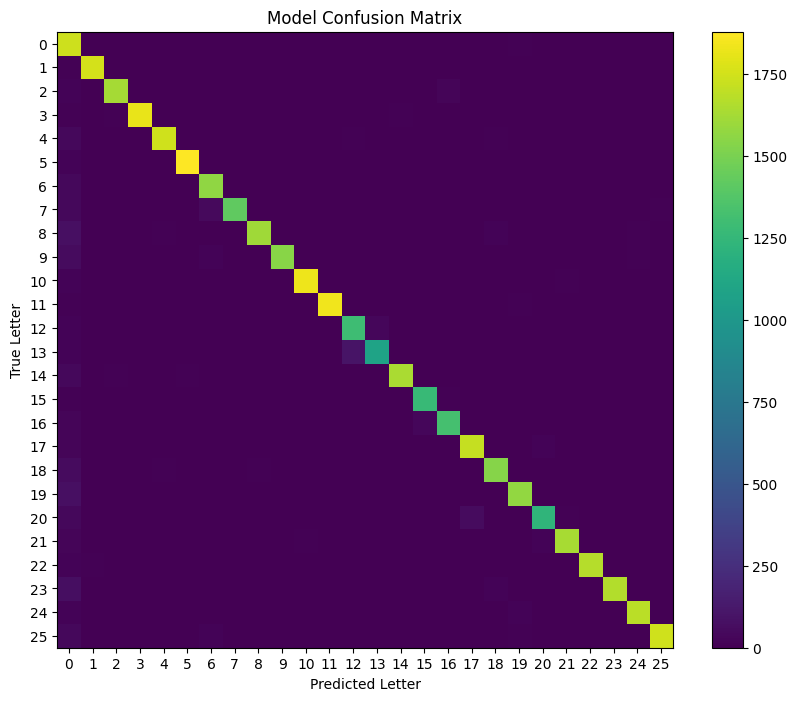

              precision    recall  f1-score   support

           0       0.68      0.98      0.80      1764
           1       0.98      0.99      0.99      1774
           2       0.98      0.97      0.97      1681
           3       0.99      0.98      0.98      1860
           4       0.98      0.96      0.97      1810
           5       0.99      0.98      0.99      1911
           6       0.94      0.96      0.95      1629
           7       0.99      0.93      0.96      1530
           8       0.98      0.93      0.95      1740
           9       0.99      0.93      0.96      1665
          10       0.99      0.98      0.98      1875
          11       0.99      0.98      0.99      1873
          12       0.91      0.95      0.93      1365
          13       0.96      0.89      0.93      1220
          14       0.98      0.96      0.97      1706
          15       0.97      0.97      0.97      1300
          16       0.96      0.95      0.96      1390
          17       0.96    

In [45]:
evaluate_model(y_test, y_pred)

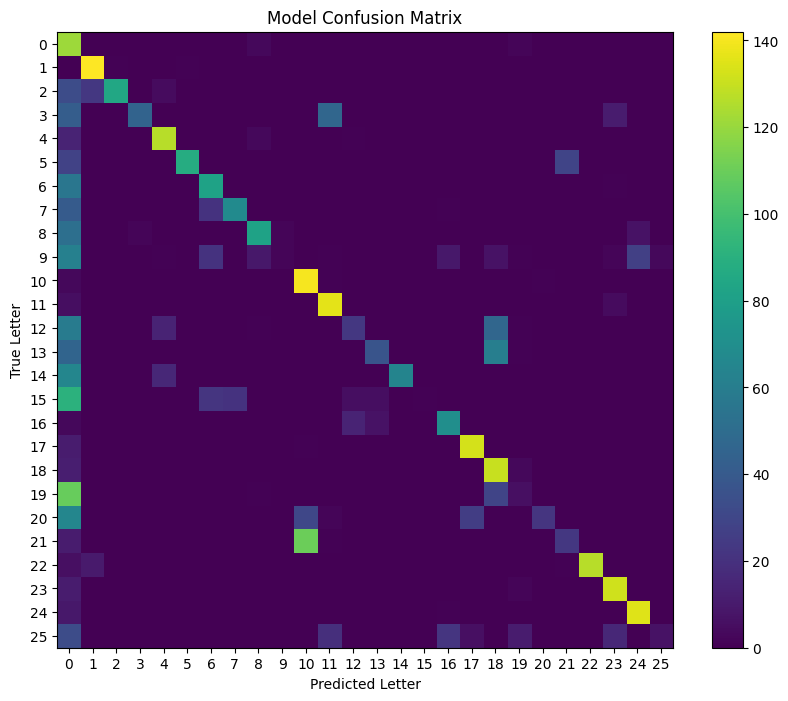

              precision    recall  f1-score   support

           0       0.12      0.96      0.22       126
           1       0.81      0.99      0.89       144
           2       0.99      0.59      0.74       145
           3       0.96      0.31      0.47       145
           4       0.78      0.88      0.83       145
           5       0.99      0.61      0.75       145
           6       0.56      0.59      0.58       139
           7       0.76      0.52      0.62       131
           8       0.83      0.57      0.67       145
           9       0.50      0.01      0.03       145
          10       0.50      0.97      0.66       145
          11       0.66      0.94      0.77       145
          12       0.53      0.16      0.24       145
          13       0.76      0.26      0.38       145
          14       1.00      0.44      0.61       145
          15       1.00      0.01      0.01       145
          16       0.68      0.74      0.71        94
          17       0.81    

In [46]:
evaluate_model(y_real, y_pred_real)